In [1]:
# ---------------------------  IMPORTS  -------------------------------------- #

import pandas as pd                 
import numpy as np          
from pandas import Series        


import matplotlib.pyplot as plt 
%matplotlib inline


import warnings                  
warnings.filterwarnings("ignore")

from datetime import datetime   

In [4]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")


train_original=train.copy()
test_original=test.copy()

print(train.columns, test.columns)

print(train.dtypes, test.dtypes)

print(train.shape, test.shape)

Index(['ID', 'Datetime', 'Count'], dtype='object') Index(['ID', 'Datetime'], dtype='object')
ID           int64
Datetime    object
Count        int64
dtype: object ID           int64
Datetime    object
dtype: object
(18288, 3) (5112, 2)


In [5]:
train_original.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
# Furthur breakdown Date and Time in Year, Month, Day , Hours
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [9]:
# Adding additional feature of Weekdaya and Weekend. 
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
# No. 5 & 6 will be weekend, so replace it with 1 
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [11]:
# Apply the values of Weekdays as 0 and Weekend as 1 
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

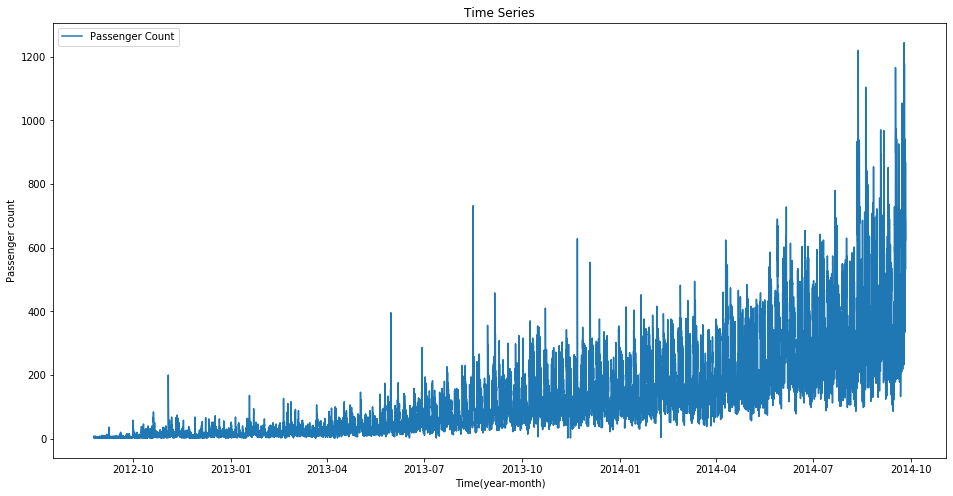

In [12]:
# Plotting of Count of passenger on time axis
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

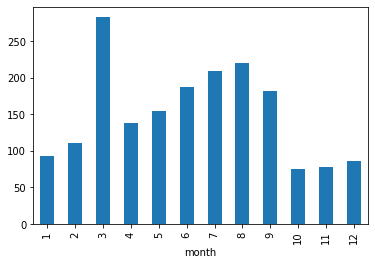

In [13]:

train.groupby('month')['Count'].mean().plot.bar()   # Month wise customer count plot

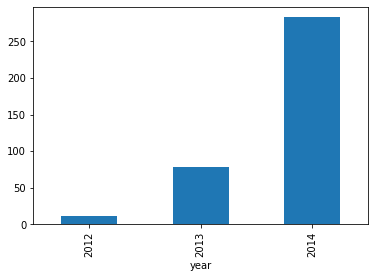

In [14]:
train.groupby('year')['Count'].mean().plot.bar()    # Year wise customer count plot

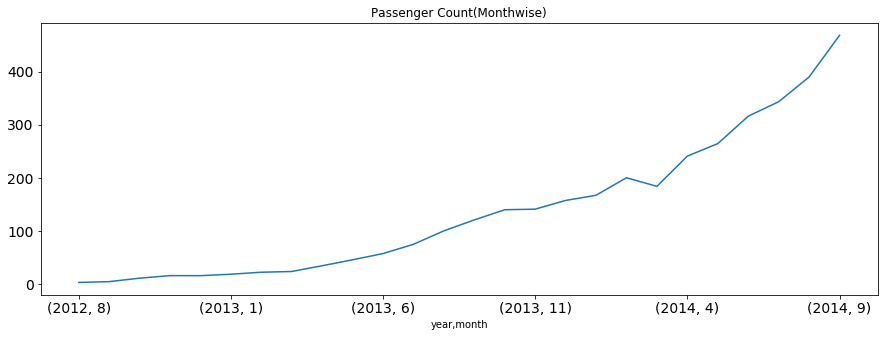

In [15]:
# Monthly mean of each year seperately
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

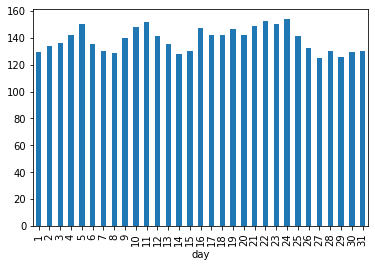

In [16]:
train.groupby('day')['Count'].mean().plot.bar()     # Day Wise customer count plot


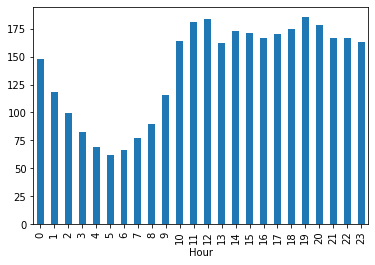

In [17]:
train.groupby('Hour')['Count'].mean().plot.bar()    # Hour wise customer count plot


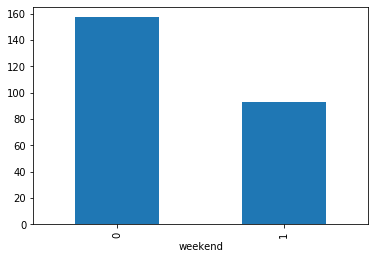

In [18]:
train.groupby('weekend')['Count'].mean().plot.bar() # Weekend and Weekday Plot


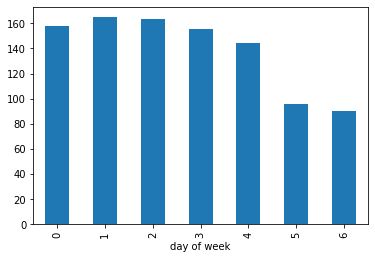

In [19]:
train.groupby('day of week')['Count'].mean().plot.bar()  # Every day of the week customer count plot

In [20]:

# ---------------------------  AGGREGATE HOURLY DATA TO DAILY, WEEKLY AND MONTHLY  -------------------------------------- #
train=train.drop('ID',1)
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

hourly = train.resample('H').mean()  # Hourly time series
daily = train.resample('D').mean()   # Converting to daily mean
weekly = train.resample('W').mean()  # Converting to weekly mean
monthly = train.resample('M').mean() # Converting to monthly mean


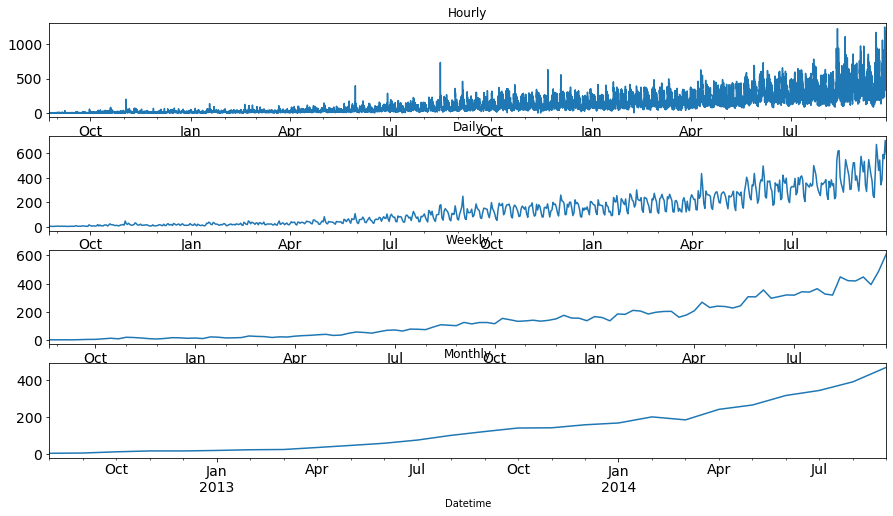

In [21]:
# Plot Hourly, Daily, Weekly and Monthly data
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

In [22]:
# Working on Daily Time Series on Test and Train Data
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

test = test.resample('D').mean()    # Converting to daily mean

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

train = train.resample('D').mean()  # Converting to daily mean

In [27]:
# ---------------------------  SPLITTING DATA IN TRAINNG AND VALIDATION PART  -------------------------------------- #

# To divide the data into training and validation set, Taking last 3 months as the validation data and rest for training data.
Train=train.index['2012-08-25':'2014-06-24']
valid=train.index['2014-06-25':'2014-09-25']

TypeError: slice indices must be integers or None or have an __index__ method

In [25]:

# Plot Train and Validation Data
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

NameError: name 'Train' is not defined